## Курсовой проект: рекламный сервер
### Задание 3
## Розенвальд Михаль
### 141

## Задача Коши
### Метод Эйлера  с порядок аппроксимации - O(h)

$x_i=x_{i-1}+(t_i-t_{i-1})f(t_{i-1},x_{i-1},y_{i-1})$

$y_i=y_{i-1}+(t_i-t_{i-1})f(t_{i-1},x_{i-1},y_{i-1}),\quad i=1,2,3,\dots,n.$



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, log, e

In [2]:
def euler_method_tow_dim (fun_x, x_0, fun_y, y_0, t_0, T, tau):
    t_steps = np.arange(t_0, T, tau)
    x = []
    y = []
    x_prev = x_0
    y_prev = y_0
    t_prev = t_0
    for i in range(len(t_steps)):
        t_prev = t_steps[i]
        x_next = x_prev + tau * fun_x(x_prev, y_prev) # x(t_prev) # fun(t_pred, x_pred)
        y_next = y_prev + tau * fun_y(x_prev, y_prev) # y(t_prev) # fun(t_pred, y_pred)
        x.append(x_next)
        y.append(y_next)
        x_prev = x_next
        y_prev = y_next
    tabu_df = pd.DataFrame(columns=('t', 'x', 'y'))
    tabu_df['t'] = t_steps
    tabu_df['x'] = x
    tabu_df['y'] = y

    return tabu_df

Рассмотрим систему дифференциальных уравнений:
$ \left\{\begin{array}{l} {\frac{dx}{dt} =-2x+4y,} \\ {\frac{dy}{dt} =-x+3y,} \\ {x\left(0\right)=3,y\left(0\right)=0} \end{array}\right. $

Аналитическое решение системы:
$ \left\{\begin{array}{l} {x\left(t\right)=4e^{-t} -e^{2t},} \\ {y\left(t\right)=e^{-t} -e^{2t}} \end{array}\right. $

In [3]:
fun_x = lambda x, y: -2*x + 4*y
fun_y = lambda x, y: -x + 3*y
x_0 = 3
y_0 = 0
t_0 = 0
T = 1
tau = 0.001
x_y_t_tabu = euler_method_tow_dim(fun_x, x_0, fun_y, y_0, t_0, T, tau)

In [5]:
x_analyt = lambda t: 4*e**(-t) - e**(2*t)
y_analyt = lambda t: e**(-t) - e**(2*t)
t_steps = np.arange(t_0, T, tau)

x_vals = [x_analyt(t) for t in t_steps]
y_vals = [y_analyt(t) for t in t_steps]

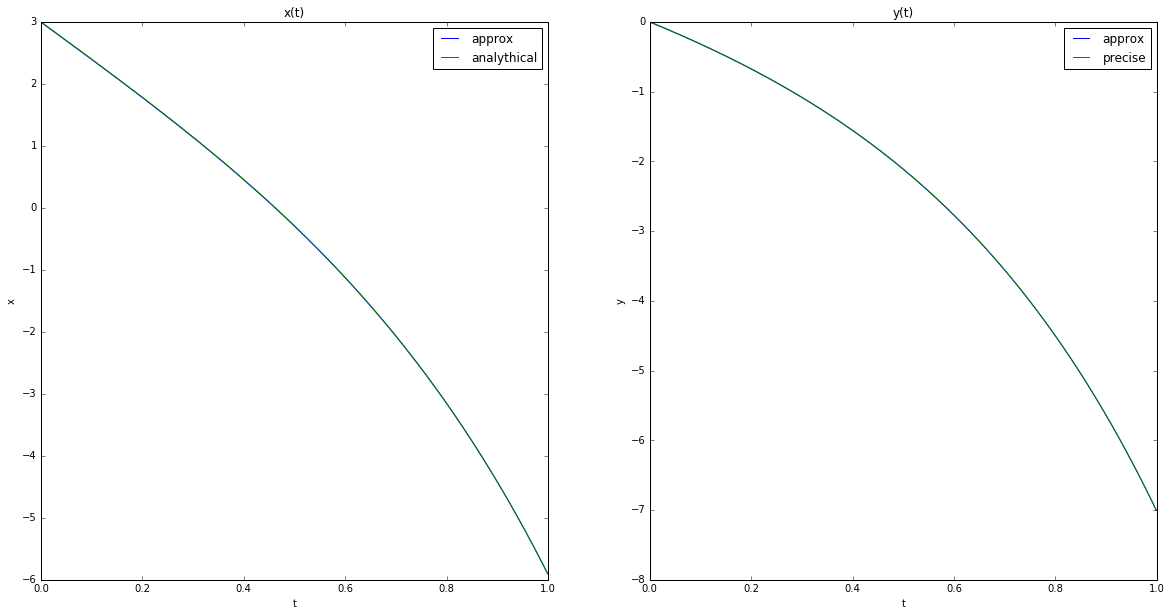

In [6]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

axis[0].plot(x_y_t_tabu['t'], x_y_t_tabu['x'], label="approx")
axis[0].set_xlabel("t")
axis[0].set_ylabel("x")
axis[0].set_title("x(t)")
axis[0].plot(t_steps, x_vals, label="analythical")
axis[0].set_xlabel("t")
axis[0].set_ylabel("x")
axis[0].set_title("x(t)")
axis[0].legend()

axis[1].plot(x_y_t_tabu['t'], x_y_t_tabu['y'], label="approx")
axis[1].set_xlabel("t")
axis[1].set_ylabel("y")
axis[1].set_title("y(t)")
axis[1].plot(t_steps, y_vals, label="precise")
axis[1].set_xlabel("t")
axis[1].set_ylabel("y")
axis[1].set_title("y(t)")
axis[1].legend()

In [7]:
def error(x_approx, x_analyt):
    return np.max(np.abs(np.array(x_approx) - np.array(x_analyt)))    

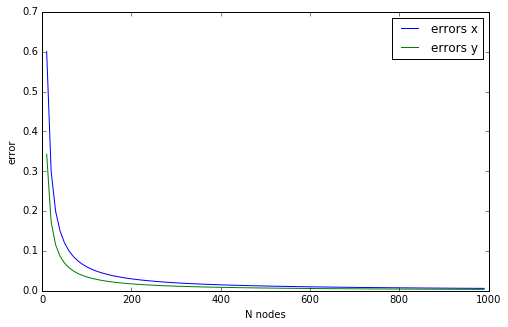

In [11]:
nnodes = np.arange(10, 1000, 10)
steps = []
errors_x = []
errors_y = []
t_0 = 0
T = 1
for n in nnodes:
    tau = 1.0 / n
    t_steps = np.arange(t_0, T, tau)

    steps.append(tau)
    x_prec_vals = [x_analyt(t) for t in t_steps]
    y_prec_vals = [y_analyt(t) for t in t_steps]
    x_y_t_tabu = euler_method_tow_dim(fun_x, x_0, fun_y, y_0, t_0, T, tau)
    errors_x.append(error(x_y_t_tabu.x, x_prec_vals))
    errors_y.append(error(x_y_t_tabu.y, y_prec_vals))
plt.figure(figsize=(8,5))
plt.plot(nnodes, errors_x, label="errors x")
plt.xlabel("N nodes")
plt.ylabel("error")
plt.plot(nnodes, errors_y, label="errors y")
plt.legend()

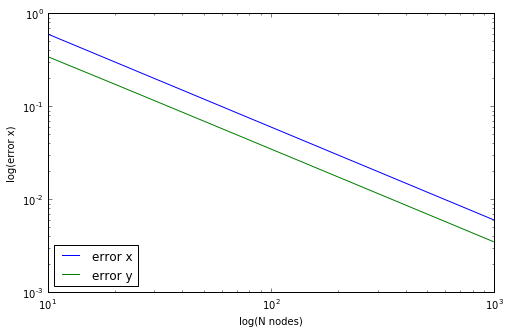

In [12]:
plt.figure(figsize=(8,5))
plt.plot(nnodes, errors_x, label="error x")
plt.plot(nnodes, errors_y, label="error y")
plt.xlabel("log(N nodes)")
plt.ylabel("log(error x)")
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc=3)

Посмотрим на коэффициенты полученных прямых

In [13]:
coefs = np.polyfit(np.log(nnodes), np.log(errors_x), deg=1)
coefs

array([-1.        ,  1.79175947])

In [14]:
coefs = np.polyfit(np.log(nnodes), np.log(errors_y), deg=1)
coefs

array([-0.99841985,  1.23876147])

Порядок аппроксимации метода - первый, что соответствует аналитическому выводу.

Погрешность метода - как быстро уменьшается ошибка с уменьшением шага